In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math

la frequenza di taglio attesa è 13968.336182079953 Hz


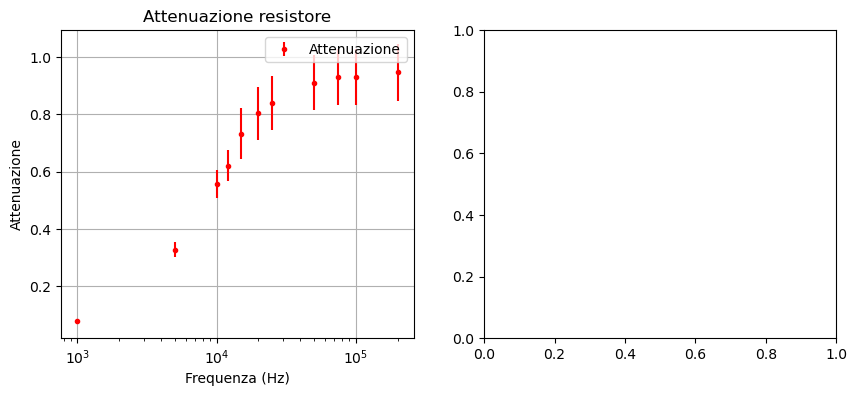

In [17]:
#resistenza, capacità e frequenza di taglio attesa
R = 6742 #Ohm
C = 1.690*10**(-9) #F
F0exp = 1/(R*C*2*np.pi)
print("la frequenza di taglio attesa è {} Hz".format(F0exp))

#frequenze
F = np.array([1000, 5000, 10000, 12000, 15000, 20000, 25000, 50000, 75000, 100000, 200000])

#V in entrata
errVinp = np.array([5,5,5,5,5,5,5,5,5,5,5])
Vin = np.array([5.4,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6])
errVin = errVinp * (2/25)

#V in uscita
errVoutp = np.array([0.5,1,2,2,5,5,5,5,5,5,5])
Vout = np.array([0.420, 1.84,3.12,3.48,4.10,4.5,4.7,5.1,5.2,5.2,5.3])
errVout = errVoutp * (2/25)

#Attenuazione
A = Vout/Vin
errA = A*np.sqrt((errVin/Vin)**2+(errVout/Vout)**2)

#Grafico
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

#Grafico: attenuazione
axes[0].errorbar(F, A, yerr = errA, label='Attenuazione', fmt = 'o', markersize = 3, color='red')
axes[0].set_title('Attenuazione resistore')
axes[0].set_xlabel('Frequenza (Hz)')
axes[0].set_ylabel('Attenuazione')
axes[0].legend()
axes[0].set_xscale('log')
axes[0].grid(True)


In [21]:
#fit attenuazione
def Ar(F, F0):
    return (F / F0) / np.sqrt(1 + (F / F0)**2)
least_squares = LeastSquares(F, A, errA, Ar)
m = Minuit(least_squares, F0 = F0exp)
m.migrad()
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.359 (χ²/ndof = 0.2)      │              Nfcn = 21               │
│ EDM = 5.29e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ F0   │  14.4e3   │   0.8e3   │   -0.8e3   │   0.9e3    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │          F0           │
├──────────┼───────────┬───────────┤
│  Error   │  -0.8e3   │   0.9e3   │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌────┬──────────┐
│    │       F0 │
├────┼──────────┤
│ F0 │ 6.81e+05 │
└────┴──────────┘

Text(0, 0.5, 'Attenuazione')

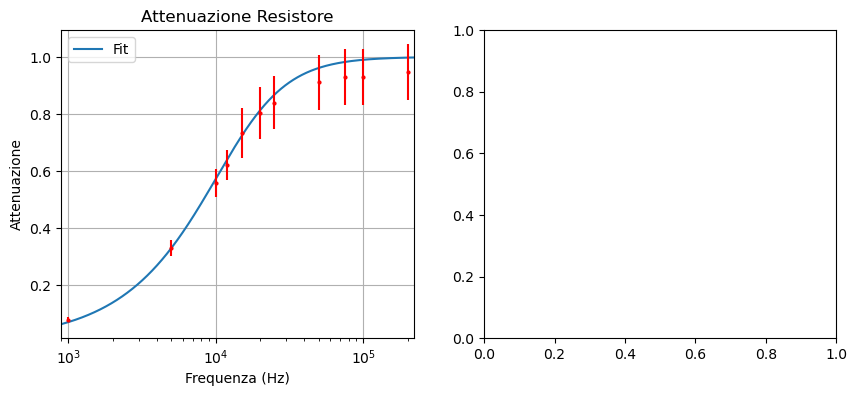

In [23]:
figg, axess = plt.subplots(1, 2, figsize=(10, 4))
F0a = m.values[0]
errF0a = m.errors[0]
x = np.linspace(min(F)*0.9,max(F)*1.1,max(F)-min(F))
#attenuazione
axess[0].plot(x,Ar(x,F0a), label = 'Fit')
axess[0].set_title('Attenuazione Resistore')
axess[0].legend()
axess[0].set_xscale('log')
axess[0].grid(True)
axess[0].errorbar(F, A, yerr=errA, fmt = 'o', color ='red', markersize = 2)
axess[0].set_xlim(min(F)*0.9,max(F)*1.1)
axess[0].set_xlabel("Frequenza (Hz)")
axess[0].set_ylabel("Attenuazione")

In [25]:
#Risultati
print("F0 attenuazione resistore {} +/- {}".format(F0a,errF0a))
#consistenza
test2 = abs((F0a - F0exp)/errF0a)
print("F0a e F0exp consistenti entro {} sigma".format(test2))

F0 attenuazione resistore 14352.822493103578 +/- 825.3918051263653
F0a e F0exp consistenti entro 0.4658227869911572 sigma
